In [24]:
## Load required packages for CNN modeling
%pylab inline --no-import-all
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical ## to transform data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## TBD: Same with the MLP from sklearn possible - should we evaluate this as well

Populating the interactive namespace from numpy and matplotlib


In [25]:
## Load data
with np.load("training-dataset.npz") as data:
    img = data["x"] ## test dataset
    lbl = data["y"]

In [26]:
## Check shape of the dataset
print(img.shape)
print(lbl.shape)
print(type(img))
print(type(lbl))

(124800, 784)
(124800,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
## print one instance
print(img[1,:])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   4   4   2   2   2   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   2   4   5   9  32  32  21  21  20   9   4
   2   0   0   0   0   0   0   0   0   0   0   0   0   0   3  21  34  82
 125 129 140 203 203 174 172 170 140 125  63  18   0   0   0   0   0   0
   0   0   0   1  20  34  84 170 204 233 249 250 250 254 254 252 252 252
 250 237 111  32   0   0   0   0   0   0   0   0   0   8  77 115 172 232
 245 252 254 254 254 254 254 254 254 253 247 206  76  20   0   0   0   0
   0   0   0   0   7  90 218 243 252 254 254 254 254 254 255 255 254 254
 247 207 159  47   7   1   0   0   0   0   0   0   0   3  22 159 245 253
 254 254 252 251 254 254 254 254 254 253 221 127  7

In [5]:
## print one instance (label)
print(lbl[0])

23


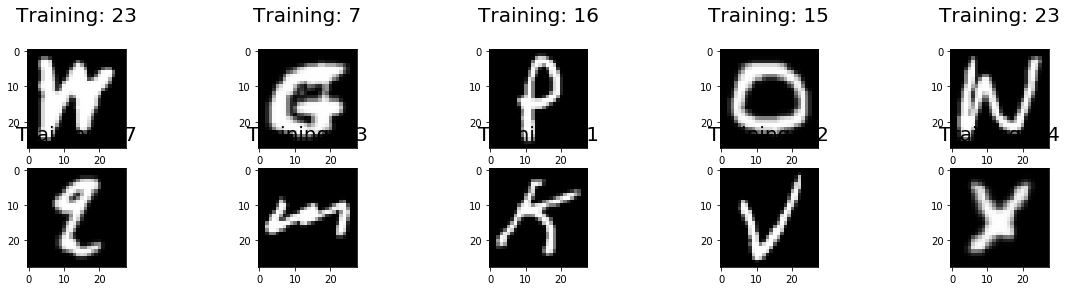

In [6]:
## Display example digits
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(img[0:10], lbl[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

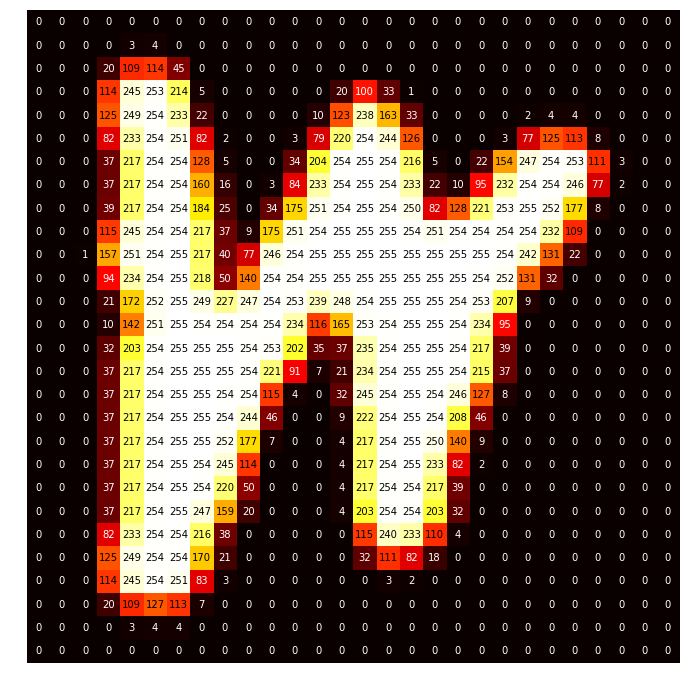

In [7]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='hot')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)

visualize_input(img[0,:].reshape(28,28), ax)

#plt.title(img[3,0])
plt.axis("off")
plt.show()


## source: https://www.kaggle.com/darkside92/simple-best-digit-recognizer-with-cnn-top-5/comments#497794

In [4]:
## Split into train and test sets (80 vs 20%)
## TBD: How about cross-validation?, 
x_train, x_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=0)

In [5]:
# Check the shape after the split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(99840, 784)
(99840,)
(24960, 784)
(24960,)


In [6]:
# Reshape the images data (each pixel can have a value between 0.0 to 1.0)
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

C:\Users\meret\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
## Encode categorical label data
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
Y = lb.fit_transform(y_train)
X = x_train
Y_test = lb.fit_transform(y_test)
X_test = x_test

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(99840, 784)
(99840,)
(24960, 784)
(24960,)


In [14]:
## Define the model
## TBD: Conv2d - https://medium.com/@mjbhobe/mnist-digits-classification-with-keras-ed6c2374bd0e
## TBD: More layers?
model = Sequential()
# Add two hidden layers, use the relu activation.
model.add(Dense(512, input_dim=784, activation='tanh')) # activation could also be "tanh"
model.add(Dense(256, activation='tanh'))
# The final layer is the output layer with an inverse logit activation function.
model.add(Dense(26, activation='softmax'))
# Use the Adam optimizer. Adam works similar to regular SGD, 
# but with some important improvements: https://arxiv.org/abs/1412.6980
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ["accuracy"]) #for multiclass classification

In [15]:
model = model.fit(X,Y, epochs=10, batch_size=16, verbose=0)#, batch_size=64)
##TBD: Add cross validation https://medium.com/@mjbhobe/mnist-digits-classification-with-keras-ed6c2374bd0e

In [38]:
# training the model and saving metrics in history
results = model.fit(X, Y,
          batch_size=128, epochs=10,
          verbose=0,
          validation_data=(X_test, Y_test))

model.summary()

Train on 99840 samples, validate on 24960 samples
Epoch 1/20
 - 42s - loss: 0.6711 - accuracy: 0.7988 - val_loss: 0.4637 - val_accuracy: 0.8561
Epoch 2/20
 - 44s - loss: 0.3820 - accuracy: 0.8783 - val_loss: 0.3709 - val_accuracy: 0.8817
Epoch 3/20
 - 58s - loss: 0.3144 - accuracy: 0.8967 - val_loss: 0.3640 - val_accuracy: 0.8831
Epoch 4/20
 - 56s - loss: 0.2752 - accuracy: 0.9076 - val_loss: 0.3405 - val_accuracy: 0.8918
Epoch 5/20
 - 49s - loss: 0.2486 - accuracy: 0.9154 - val_loss: 0.3335 - val_accuracy: 0.8944
Epoch 6/20
 - 60s - loss: 0.2285 - accuracy: 0.9216 - val_loss: 0.3466 - val_accuracy: 0.8913
Epoch 7/20
 - 53s - loss: 0.2126 - accuracy: 0.9253 - val_loss: 0.3298 - val_accuracy: 0.9000
Epoch 8/20
 - 49s - loss: 0.1997 - accuracy: 0.9296 - val_loss: 0.3395 - val_accuracy: 0.8962
Epoch 9/20
 - 51s - loss: 0.1883 - accuracy: 0.9320 - val_loss: 0.3430 - val_accuracy: 0.8951
Epoch 10/20
 - 45s - loss: 0.1825 - accuracy: 0.9349 - val_loss: 0.3517 - val_accuracy: 0.8954
Epoch 11/

In [22]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.42181431790575
Test accuracy: 0.8830128312110901


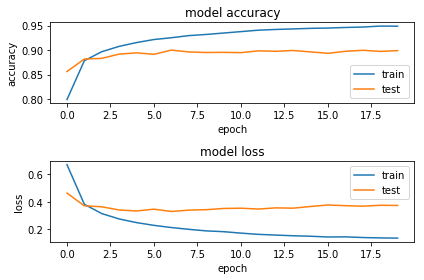

In [39]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [32]:
loss_and_metrics_train = model.evaluate(X, Y, verbose=2)
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Train Loss", loss_and_metrics_train[0])
print("Train Accuracy", loss_and_metrics_train[1])
print()
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Train Loss 0.18212485645646945
Train Accuracy 0.934965968132019

Test Loss 0.3274253067202293
Test Accuracy 0.8981170058250427


In [30]:
settings = []

for a in ['tanh', 'relu']:
    for o in ['adam']:
        model = Sequential()
        model.add(Dense(256, input_dim=784, activation=a))
        model.add(Dense(128, activation=a))
        model.add(Dense(26, activation='softmax'))
        model.compile(optimizer=o, loss='categorical_crossentropy', metrics = ["accuracy"]) 
        model.fit(X, Y, batch_size=32, epochs=5, verbose=2, validation_data=(X_test, Y_test))
        score = model.evaluate(X_test, Y_test, verbose=0)
        settings.append((a, o, score[0], score[1]))
        print(settings[-1])

best_loss = min(settings, key=lambda x: x[-2])
best_accuracy =  max(settings, key=lambda x: x[-1])
print("Best settings according to loss {}".format(best_loss))
print("Best settings according to accuracy {}".format(best_accuracy))

Train on 99840 samples, validate on 24960 samples
Epoch 1/5
 - 23s - loss: 0.7213 - accuracy: 0.7869 - val_loss: 0.4688 - val_accuracy: 0.8526
Epoch 2/5
 - 22s - loss: 0.3843 - accuracy: 0.8787 - val_loss: 0.3903 - val_accuracy: 0.8761
Epoch 3/5
 - 22s - loss: 0.3101 - accuracy: 0.8993 - val_loss: 0.3450 - val_accuracy: 0.8887
Epoch 4/5
 - 22s - loss: 0.2648 - accuracy: 0.9132 - val_loss: 0.3308 - val_accuracy: 0.8931
Epoch 5/5
 - 23s - loss: 0.2360 - accuracy: 0.9210 - val_loss: 0.3453 - val_accuracy: 0.8913
('tanh', 'adam', 0.3452760880263761, 0.8912660479545593)
Train on 99840 samples, validate on 24960 samples
Epoch 1/5
 - 24s - loss: 0.6449 - accuracy: 0.8033 - val_loss: 0.4081 - val_accuracy: 0.8702
Epoch 2/5
 - 22s - loss: 0.3510 - accuracy: 0.8877 - val_loss: 0.3633 - val_accuracy: 0.8855
Epoch 3/5
 - 22s - loss: 0.2836 - accuracy: 0.9063 - val_loss: 0.3290 - val_accuracy: 0.8953
Epoch 4/5
 - 22s - loss: 0.2453 - accuracy: 0.9173 - val_loss: 0.3259 - val_accuracy: 0.8964
Epoch 

In [48]:
#model.predict_classes(X_test)

In [47]:
#model.predict(X_test)

In [ ]:
## Logistic Regression
## Source: https://www.codementor.io/@mgalarny/making-your-first-machine-learning-classifier-in-scikit-learn-python-db7d7iqdh

In [2]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)

In [3]:
## Load data
with np.load("training-dataset.npz") as data:
    img = data["x"] ## test dataset
    lbl = data["y"]

In [4]:
from sklearn.model_selection import train_test_split
## Split into train and test sets (80 vs 20%)
## TBD: How about cross-validation?,
x_train, x_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=0)

In [5]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [12]:
# Reshape the images data (each pixel can have a value between 0.0 to 1.0)
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(24960, 784)
(60000,)
(24960,)


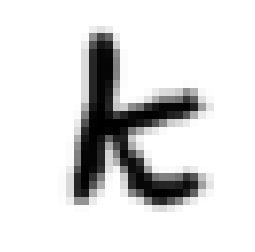

In [10]:
## Source: Hands-On Machine Learning Book
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = x_train[36000]
#print(some_digit)
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
### TBD: Add Cross Validation?

In [32]:
##https://thedatafrog.com/en/articles/handwritten-digit-recognition-scikit-learn/
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(256,), activation='relu', alpha=0.0001,
                    solver='adam', tol=1e-4, random_state=1,
                    learning_rate_init=.001, verbose=True)

In [33]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 1.13503871
Iteration 2, loss = 0.64776065
Iteration 3, loss = 0.49488730
Iteration 4, loss = 0.41413524
Iteration 5, loss = 0.36133308
Iteration 6, loss = 0.32534348
Iteration 7, loss = 0.29583360
Iteration 8, loss = 0.27152758
Iteration 9, loss = 0.25264781
Iteration 10, loss = 0.23584922
Iteration 11, loss = 0.22008797
Iteration 12, loss = 0.20664390
Iteration 13, loss = 0.19340854
Iteration 14, loss = 0.18255579
Iteration 15, loss = 0.17339289
Iteration 16, loss = 0.16255489
Iteration 17, loss = 0.15370575
Iteration 18, loss = 0.14698578
Iteration 19, loss = 0.13670986
Iteration 20, loss = 0.12923510
Iteration 21, loss = 0.12471448
Iteration 22, loss = 0.11925329
Iteration 23, loss = 0.11316052
Iteration 24, loss = 0.10850310
Iteration 25, loss = 0.10214508
Iteration 26, loss = 0.09673655
Iteration 27, loss = 0.09291417
Iteration 28, loss = 0.08730045
Iteration 29, loss = 0.08575386
Iteration 30, loss = 0.08175827
Iteration 31, loss = 0.07963591
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(256,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [34]:
predictions = mlp.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8811298076923076

In [15]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train) # y_train, not y_train_5

C:\Users\meret\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [16]:
sgd_clf.predict(x_test)

array([25, 22, 14, ...,  4, 22,  5], dtype=uint8)

In [19]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(sgd_clf.predict(x_test), y_test)
print(acc)

0.598798076923077


In [21]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [22]:
forest_clf.predict_proba(x_test)

array([[0.3, 0. , 0. , ..., 0.4, 0.2, 0. ],
       [0. , 0. , 0. , ..., 0.1, 0.1, 0. ],
       [0.3, 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.1, 0. , 0.2],
       [0. , 0. , 0. , ..., 0. , 0.3, 0. ],
       [0.1, 0. , 0. , ..., 0. , 0. , 0.1]])

In [23]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(forest_clf.predict(x_test), y_test)
print(acc)

0.8056490384615385


In [21]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([25], dtype=uint8)

In [23]:
predictions = logisticRegr.predict(x_test)
print(predictions)

[25 22 14 ...  4 22  5]


In [24]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(logisticRegr.predict(x_test), y_test)
print(acc)
#print("Accuracy: {:.3}".format(acc))

## Pretty low accuracy - other algo such as SGD?

0.7165865384615384


In [25]:
import numpy as np 
import seaborn as sns
from sklearn import metrics

In [26]:
cm = metrics.confusion_matrix(y_test, predictions)

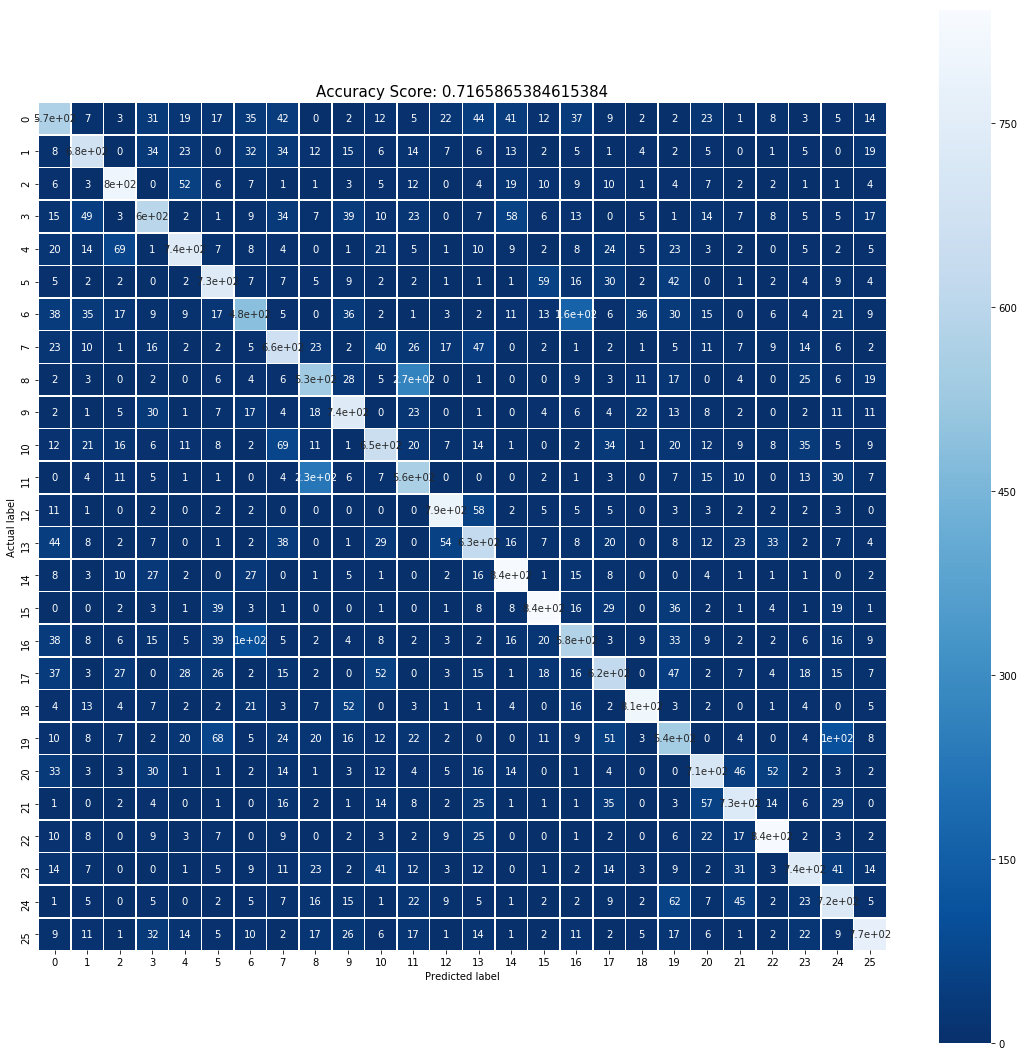

In [27]:
plt.figure(figsize=(19,19))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();

In [ ]:
## Image can be changed

In [7]:
## Task 2
## Load data
testdata = np.load('test-dataset.npy')
 #   img2 = data["x"] ## test dataset
  #  lbl2 = data["y"]

In [10]:
print(testdata.shape)
print(type(testdata))

(10000, 30, 168)
<class 'numpy.ndarray'>


In [15]:
print(testdata[0,0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.
   0.   0.   0.   0. 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  62.   0. 110. 255.   0.   0. 255. 198.   0.   0.   0.
 231.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 230. 249.   0.   0.   0.   0.   0. 118.
   0.   0.   0.   0.   0.   0.   0.   0. 255. 182.   0.   0. 130. 255.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  13.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 255.   0.  31.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 255.   0. 225.   0.   0.   0.   0.   0.   0.   0.]


In [16]:
print(testdata[0,0].shape)

(168,)
